### Import Libraries

In [1]:
import pandas as pd

import yfinance as yf
from yahoofinancials import YahooFinancials
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense

### Exxon Mobil Corporation Common Stock Data

In [2]:
xom_df = yf.download('XOM', start='1987-05-21', end='2021-01-26')
xom_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1987-05-20,10.890625,11.109375,10.875000,10.921875,3.268748,9680000
1987-05-21,11.031250,11.125000,10.875000,10.906250,3.264070,5660000
1987-05-22,10.890625,11.031250,10.781250,10.843750,3.245368,5769600
1987-05-26,10.906250,11.000000,10.843750,10.984375,3.287453,6132800
1987-05-27,10.953125,11.000000,10.890625,10.937500,3.273425,4267200


### Brent Oil Price Data

In [3]:
df_bo = pd.read_csv("BrentOilPrices.csv", parse_dates = ["Date"], index_col = "Date")
df_bo.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


### Combine Both Datasets

In [4]:
df = pd.concat([xom_df, df_bo], axis = 1)

### Select Relevant Columns

In [5]:
df = df[["Close", "Price"]]
df.columns = ["Exxon Stock Price", "Brent Oil Price"]
df.head()

,Exxon Stock Price,Brent Oil Price
Date,,
1987-05-20,10.921875,18.63
1987-05-21,10.906250,18.45
1987-05-22,10.843750,18.55
1987-05-25,NaN,18.60
1987-05-26,10.984375,18.63


In [6]:
sns.set(font_scale=1.4)

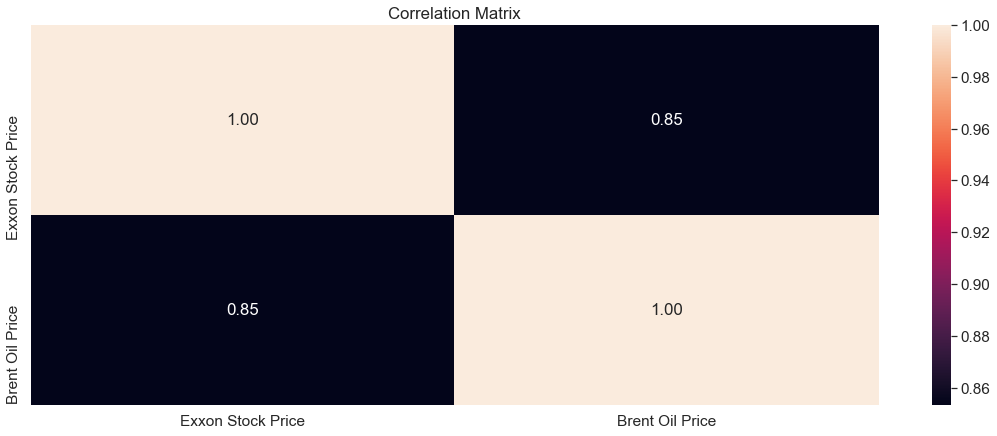

In [7]:
# Correlation
plt.figure(figsize=(19, 7))
correlation=df.corr()
sns.heatmap(correlation, annot = True, fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

In [8]:
sns.set_style("whitegrid")

### Exxon Stock Price by Date

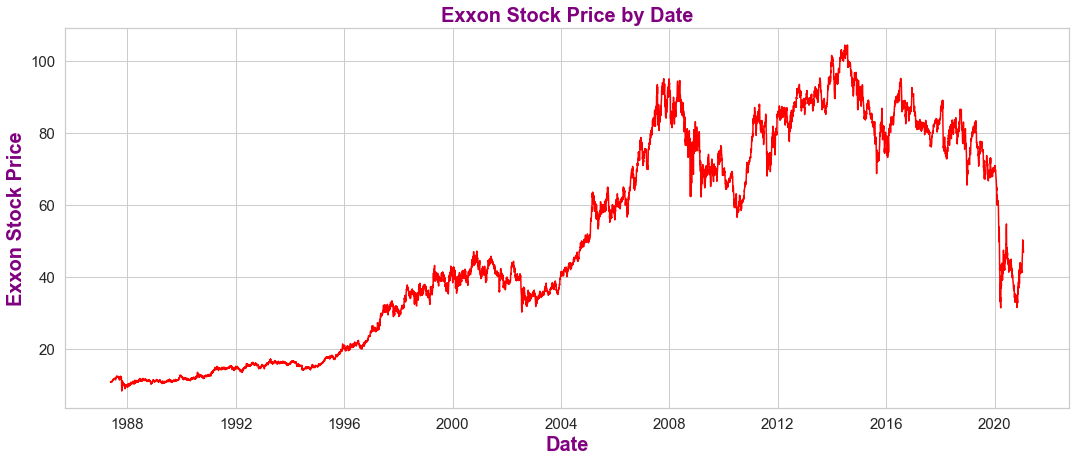

In [9]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = df.index, y = "Exxon Stock Price", data = df, color = "red")
plt.title("Exxon Stock Price by Date", color = "purple", size = 20, weight = "bold")
plt.xlabel("Date", color = "purple", size = 20, weight = "bold")
plt.ylabel("Exxon Stock Price", color = "purple", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Brent Oil Price by Date

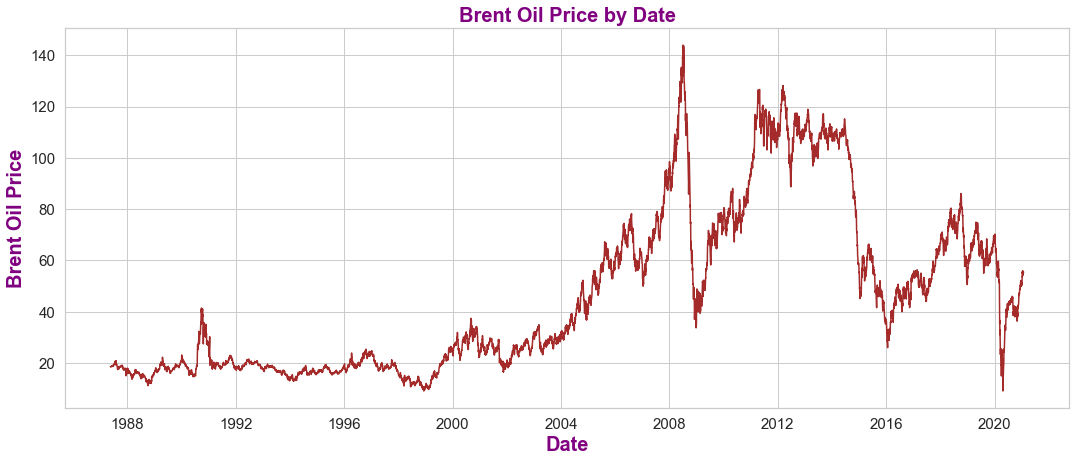

In [10]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = df.index, y = "Brent Oil Price", data = df, color = "brown")
plt.title("Brent Oil Price by Date", color = "purple", size = 20, weight = "bold")
plt.xlabel("Date", color = "purple", size = 20, weight = "bold")
plt.ylabel("Brent Oil Price", color = "purple", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Comparison of Exxon Stock Price and Brent Oil Price by Date

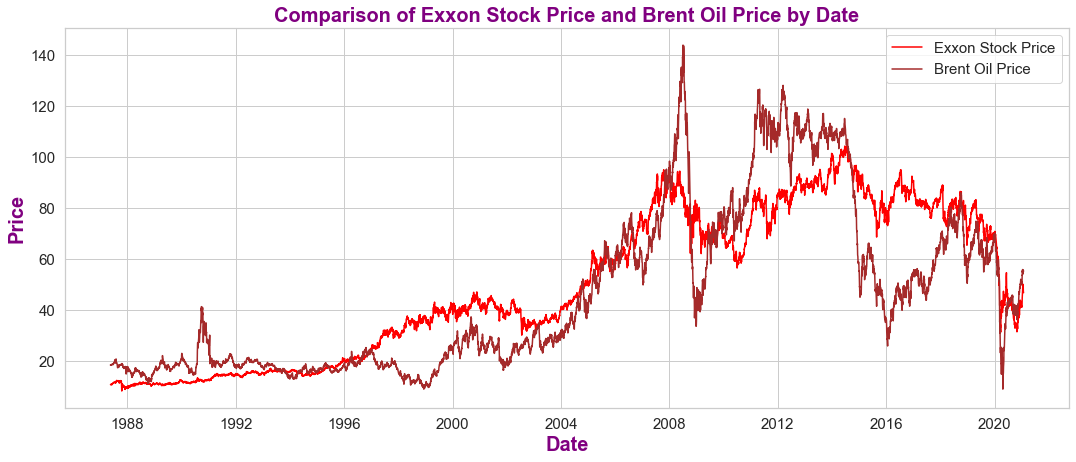

In [11]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = df.index, y = "Exxon Stock Price", data = df, color = "red", label = "Exxon Stock Price")
sns.lineplot(x = df.index, y = "Brent Oil Price", data = df, color = "brown", label = "Brent Oil Price")
plt.title("Comparison of Exxon Stock Price and Brent Oil Price by Date", color = "purple", size = 20, weight = "bold")
plt.xlabel("Date", color = "purple", size = 20, weight = "bold")
plt.ylabel("Price", color = "purple", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})
plt.show()

### Data Preprocessing

In [12]:
# Drop Null Values
df = df.dropna()

In [13]:
# Feature
X = df[["Brent Oil Price"]]

# Target
y = df["Exxon Stock Price"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    shuffle = False)

### Random Forest Regressor

In [15]:
rf = RandomForestRegressor(n_estimators = 500, n_jobs = -1, random_state = 1146)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
rf_data = pd.DataFrame({"Actual": y_test,
                        "Predicted": pred_rf})
rf_data.sample(10)

,Actual,Predicted
Date,,
2016-11-28,86.470001,48.433021
2018-07-03,82.239998,83.255598
2015-12-31,77.949997,44.128265
2016-08-31,87.139999,58.596499
2016-08-17,88.110001,60.700700
2014-06-09,101.519997,85.138042
2017-02-10,82.519997,64.269661
2020-10-05,33.740002,68.968293
2016-09-14,84.599998,56.888321


**Actual and Predicted Price by Random Forest**

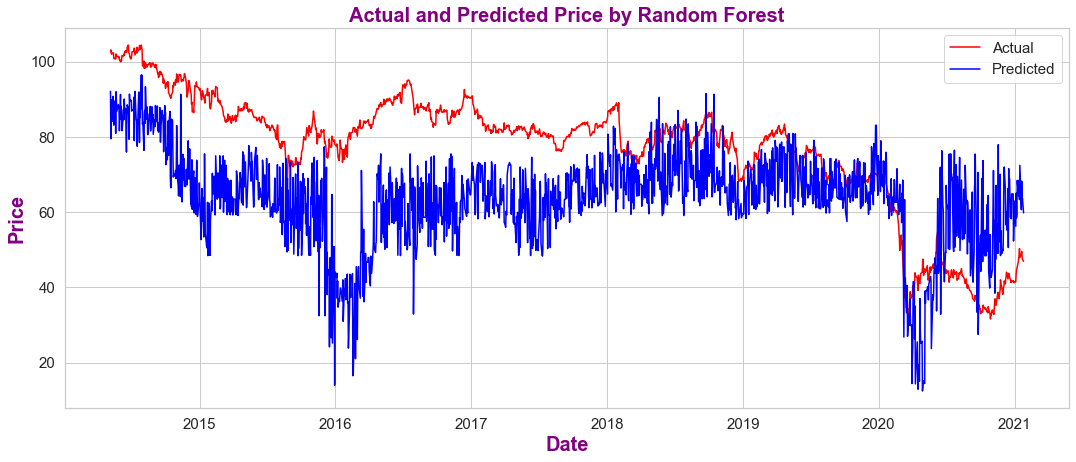

In [16]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = rf_data.index, y = "Actual", data = rf_data, color = "red", label = "Actual")
sns.lineplot(x = rf_data.index, y = "Predicted", data = rf_data, color = "blue", label = "Predicted")
plt.title("Actual and Predicted Price by Random Forest", color = "purple", size = 20, weight = "bold")
plt.xlabel("Date", color = "purple", size = 20, weight = "bold")
plt.ylabel("Price", color = "purple", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})
plt.show()

**Random Forest Performance**

In [17]:
rf_mse = mean_squared_error(y_test, pred_rf)
print("Mean Squared Error by Random Forest =", rf_mse.round(2), "\n")

rf_rmse = mean_squared_error(y_test, pred_rf, squared = False)
print("Root Mean Squared Error by Random Forest =", rf_rmse.round(2), "\n")

rf_r2_score = r2_score(y_test, pred_rf)
print("R-Squared by Random Forest =", rf_r2_score.round(2), "\n")

Mean Squared Error by Random Forest = 407.99 

Root Mean Squared Error by Random Forest = 20.2 

R-Squared by Random Forest = -0.56 



### AdaBoost With Decision Tree

**Find Best Parameters**

In [18]:
learning_rate_adb = [0.001, 0.01, 0.1, 1]
loss_adb          = ["linear", "square", "exponential"]
adb_score = []

for x in learning_rate_adb:
    for y in loss_adb:
        adb = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(random_state = 1146),
                                learning_rate = x,
                                loss = y,
                                random_state = 1146)

        adb.fit(X_train, y_train)
        pred_adb = adb.predict(X_test)
        pred_adb_mse = mean_squared_error(y_test, pred_adb)
        ans = f"x = {x}, y = {y}, mse = {pred_adb_mse}"
        adb_score.append(ans)
adb_score

['x = 0.001, y = linear, mse = 450.5522765577889',
 'x = 0.001, y = square, mse = 449.2461940815766',
 'x = 0.001, y = exponential, mse = 450.01204238305166',
 'x = 0.01, y = linear, mse = 450.4520263610499',
 'x = 0.01, y = square, mse = 450.07702805649035',
 'x = 0.01, y = exponential, mse = 450.4076081469074',
 'x = 0.1, y = linear, mse = 449.8947947292281',
 'x = 0.1, y = square, mse = 451.2867986076436',
 'x = 0.1, y = exponential, mse = 451.0535771631539',
 'x = 1, y = linear, mse = 447.89917448350946',
 'x = 1, y = square, mse = 447.02789581284196',
 'x = 1, y = exponential, mse = 425.3852461758352']

**Model with Best Parameters**

In [19]:
adb = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(random_state = 1146),
                        learning_rate = 1,
                        loss = "exponential",
                        random_state = 1146)

adb.fit(X_train, y_train)

pred_adb = adb.predict(X_test)

adb_data = pd.DataFrame({"Actual": y_test,
                        "Predicted": pred_adb})
adb_data.sample(10)

,Actual,Predicted
Date,,
2014-06-03,100.389999,87.070000
2015-08-13,78.650002,68.330002
2016-05-03,88.110001,49.799999
2017-04-18,81.050003,60.849998
2019-10-17,68.139999,60.759998
2018-10-30,78.779999,71.739998
2020-12-11,43.799999,48.950001
2016-12-19,90.419998,59.369999
2017-04-27,81.260002,56.500000


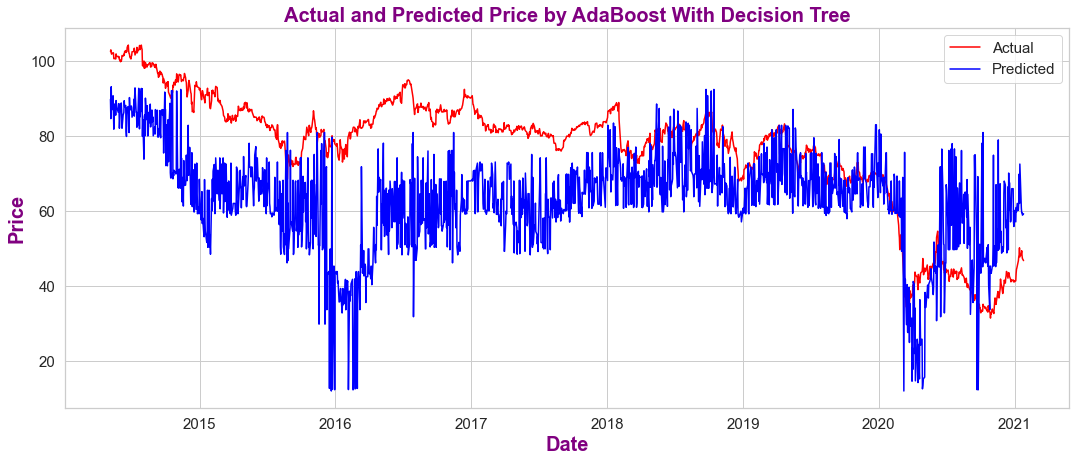

In [20]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = adb_data.index, y = "Actual", data = adb_data, color = "red", label = "Actual")
sns.lineplot(x = adb_data.index, y = "Predicted", data = adb_data, color = "blue", label = "Predicted")
plt.title("Actual and Predicted Price by AdaBoost With Decision Tree", color = "purple", size = 20, weight = "bold")
plt.xlabel("Date", color = "purple", size = 20, weight = "bold")
plt.ylabel("Price", color = "purple", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})
plt.show()

**Performance of AdaBoost With Decision Tree**

In [21]:
adb_mse = mean_squared_error(y_test, pred_adb)
print("Mean Squared Error by AdaBoost With Decision Tree =", adb_mse.round(2), "\n")

adb_rmse = mean_squared_error(y_test, pred_adb, squared = False)
print("Root Mean Squared Error by AdaBoost With Decision Tree =", adb_rmse.round(2), "\n")

adb_r2_score = r2_score(y_test, pred_adb)
print("R-Squared by AdaBoost With Decision Tree =", adb_r2_score.round(2), "\n")

Mean Squared Error by AdaBoost With Decision Tree = 425.39 

Root Mean Squared Error by AdaBoost With Decision Tree = 20.62 

R-Squared by AdaBoost With Decision Tree = -0.63 



### Artificial Neural Network

In [22]:
model = Sequential()
model.add(Dense(50, activation = "relu", input_dim = 1))
model.add(Dense(50, activation = "relu"))
model.add(Dense(50, activation = "relu"))
model.add(Dense(50, activation = "relu"))
model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
211/211 [==============================] - 1s 2ms/step - loss: 360.1205
Epoch 2/100
211/211 [==============================] - 0s 2ms/step - loss: 162.2817
Epoch 3/100
211/211 [==============================] - 0s 2ms/step - loss: 150.3725
Epoch 4/100
211/211 [==============================] - 0s 2ms/step - loss: 137.7432
Epoch 5/100
211/211 [==============================] - 0s 2ms/step - loss: 133.4806
Epoch 6/100
211/211 [==============================] - 0s 2ms/step - loss: 132.6840
Epoch 7/100
211/211 [==============================] - 0s 2ms/step - loss: 129.6918
Epoch 8/100
211/211 [==============================] - 0s 2ms/step - loss: 127.2638
Epoch 9/100
211/211 [==============================] - 0s 2ms/step - loss: 125.7295
Epoch 10/100
211/211 [==============================] - 0s 2ms/step - loss: 118.7346
Epoch 11/100
211/211 [==============================] - ETA: 0s - loss: 108.869 - 0s 1ms/step - loss: 107.6940
Epoch 12/100
211/211 [==========================

In [23]:
ann_pred = model.predict(X_test)
ann_data = pd.DataFrame({"Actual": y_test, "Predicted": ann_pred.flatten()})
ann_data.sample(10)

,Actual,Predicted
Date,,
2018-05-14,81.830002,74.028839
2014-11-25,94.779999,73.795128
2015-08-19,76.230003,58.201389
2019-08-26,67.849998,65.729980
2014-09-04,98.360001,84.167389
2017-08-02,80.599998,62.946693
2015-07-21,81.660004,64.582664
2021-01-06,44.610001,63.673325
2016-04-11,83.320000,52.130630


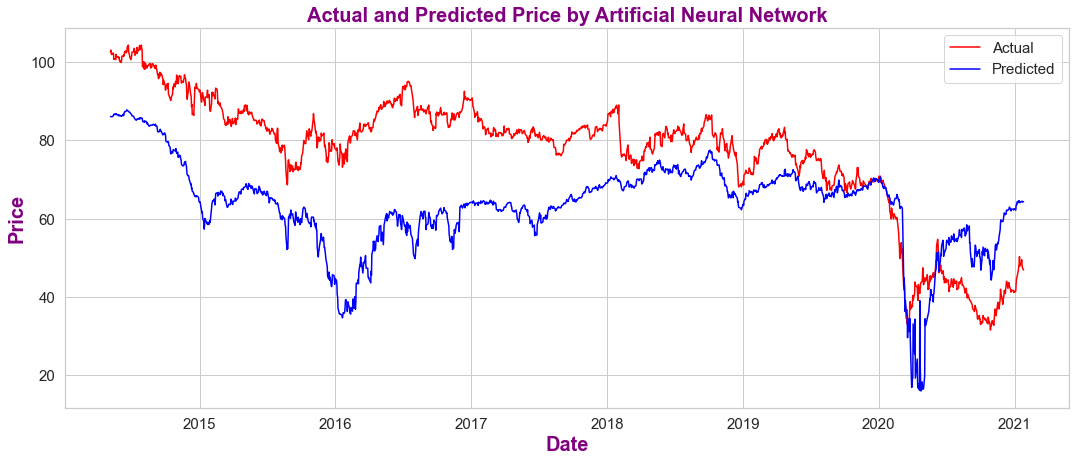

In [24]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = ann_data.index, y = "Actual", data = ann_data, color = "red", label = "Actual")
sns.lineplot(x = ann_data.index, y = "Predicted", data = ann_data, color = "blue", label = "Predicted")
plt.title("Actual and Predicted Price by Artificial Neural Network", color = "purple", size = 20, weight = "bold")
plt.xlabel("Date", color = "purple", size = 20, weight = "bold")
plt.ylabel("Price", color = "purple", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})
plt.show()

**Performance of Artificial Neural Network**

In [25]:
ann_mse = mean_squared_error(y_test, ann_pred)
print("Mean Squared Error by Artificial Neural Network =", ann_mse.round(2), "\n")

ann_rmse = mean_squared_error(y_test, ann_pred, squared = False)
print("Root Mean Squared Error by Artificial Neural Network =", ann_rmse.round(2), "\n")

ann_r2_score = r2_score(y_test, ann_pred)
print("R-Squared by Artificial Neural Network =", ann_r2_score.round(2), "\n")

Mean Squared Error by Artificial Neural Network = 361.67 

Root Mean Squared Error by Artificial Neural Network = 19.02 

R-Squared by Artificial Neural Network = -0.39 



### Best Performing Model is Artificial Neural Network